In [78]:
# 1. 결측치 제거
# 2. 각각 년도별로 group by
# 3. 정규분포를 그린후 하위 30%, 상위 30% 가격 제거
# 4. 각각의 년도별로 남은 데이터들 중에서 평균 구하기
# 5. 년도별 평균데이터 plot 그리기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats


artist = "picasso"

fields = [
    "Oil Painting","Watercolor Painting", "Drawing", "Gouache Painting", "Print" 
]

df_fields = {}
current_dir = os.getcwd()
for field in fields:
    csv_path = os.path.join(current_dir, "..", "data/picasso_by_type", "{artist}_{field}.csv".format(artist=artist, field=field))
    df_fields[field] = pd.read_csv(csv_path)


In [17]:
df_fields

{'Drawing':              artist              title             end_date  \
 0     Pablo_Picasso   Portrait d'homme  2011-05-05T00:00:00   
 1     Pablo_Picasso  Deux nus féminins  2011-05-05T00:00:00   
 2     Pablo_Picasso      Femme pensive  2011-05-05T00:00:00   
 3     Pablo_Picasso          Minotaure  2011-05-05T00:00:00   
 4     Pablo_Picasso       Tête d'homme  2011-05-05T00:00:00   
 ...             ...                ...                  ...   
 1032  Pablo Picasso                NaN  2018-11-14T07:00:00   
 1033  Pablo Picasso                NaN  2018-11-14T07:00:00   
 1034  Pablo Picasso                NaN  2018-10-19T04:30:00   
 1035  Pablo Picasso                NaN  2018-10-31T01:00:00   
 1036  Pablo Picasso                NaN  2018-10-20T03:00:00   
 
                estimate_USD     price_USD auction_site    year  \
 0     USD 250,000 - 350,000  578500.00000    Christies  1900.0   
 1       USD 60,000 - 80,000   92500.00000    Christies  1920.0   
 2       USD 20,00

In [5]:
df.count()

AttributeError: 'dict' object has no attribute 'count'

In [47]:
df = df.dropna(subset=['price_USD'])
df = df.dropna(subset=['end_date'])
df.count()

artist               22
title                14
end_date             22
estimate_USD         14
price_USD            22
auction_site         22
year                 17
artwork_type         22
edition               8
height_cm            17
width_cm             17
start_date            0
low_estimate          0
high_estimate         0
price                 0
currency              0
low_estimate_USD      8
high_estimate_USD     8
estimateCurrency      8
type                 22
dtype: int64

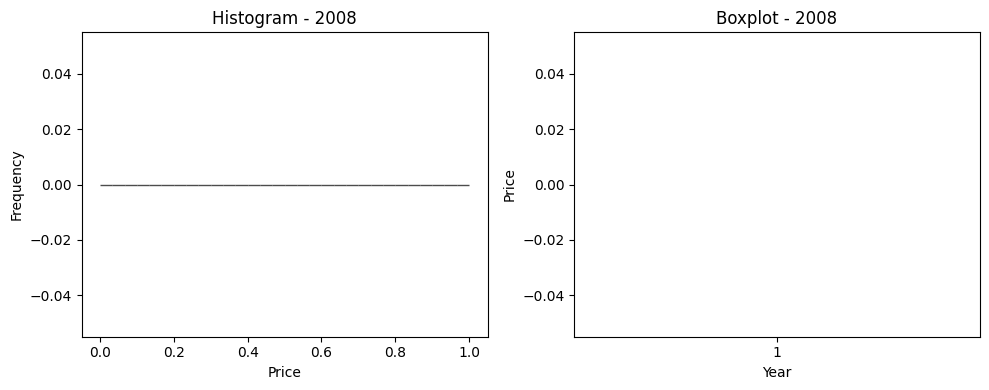

1


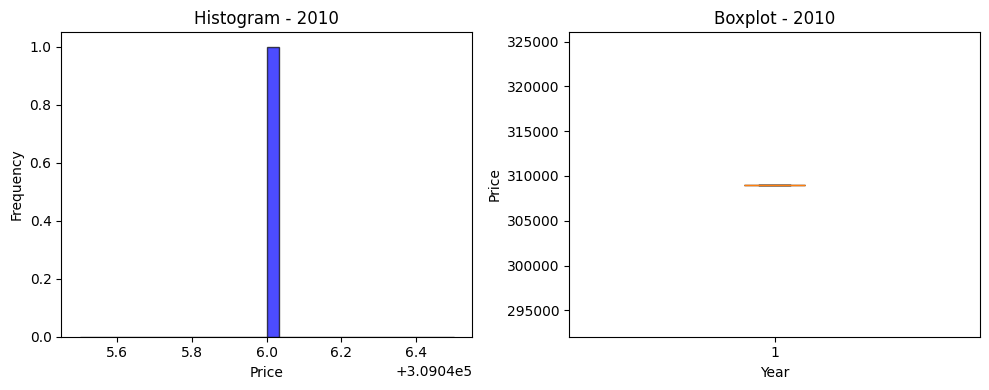

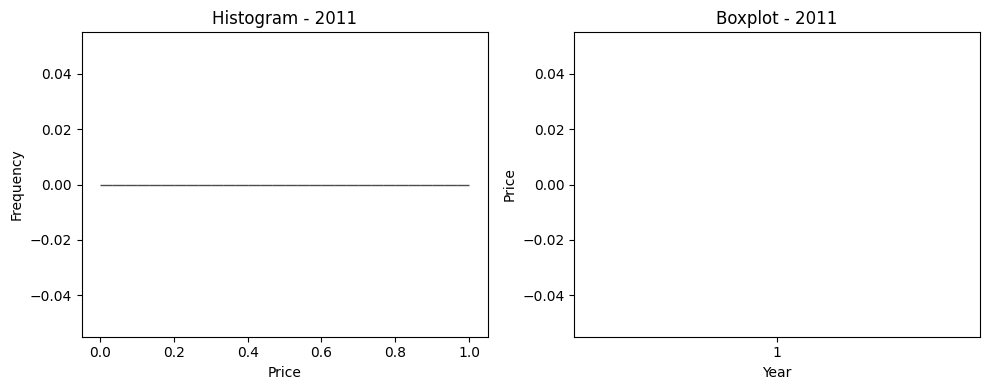

1


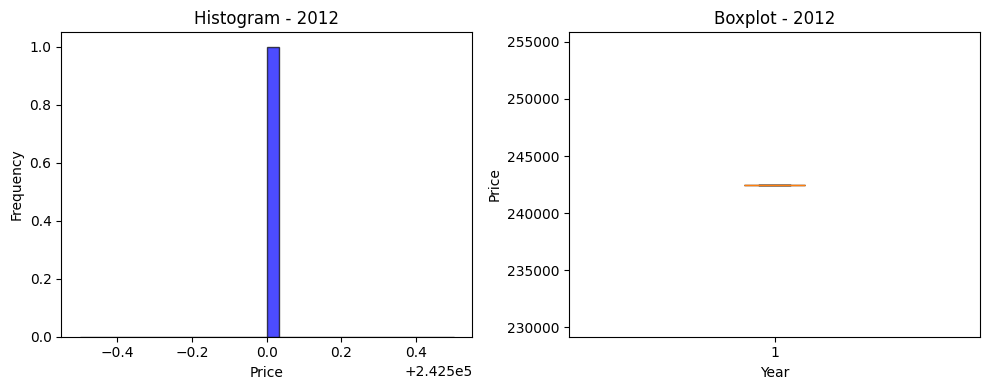

1


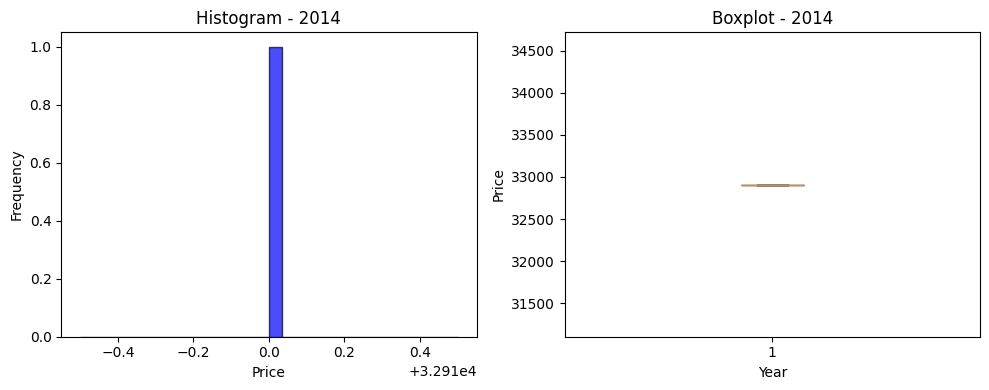

1


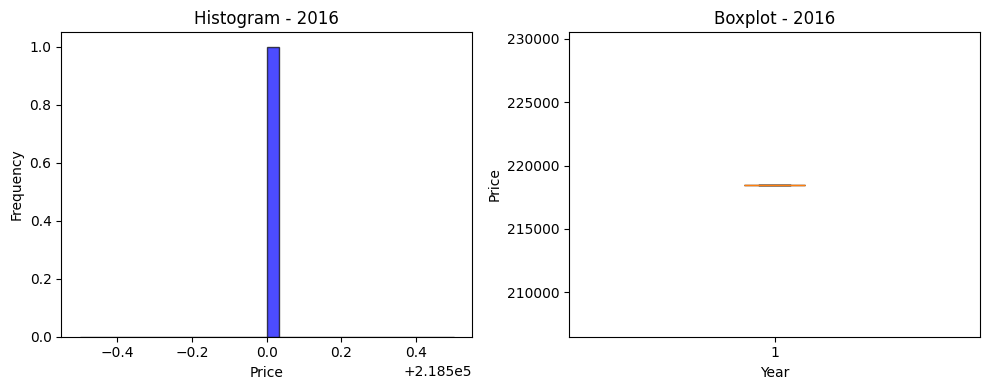

1


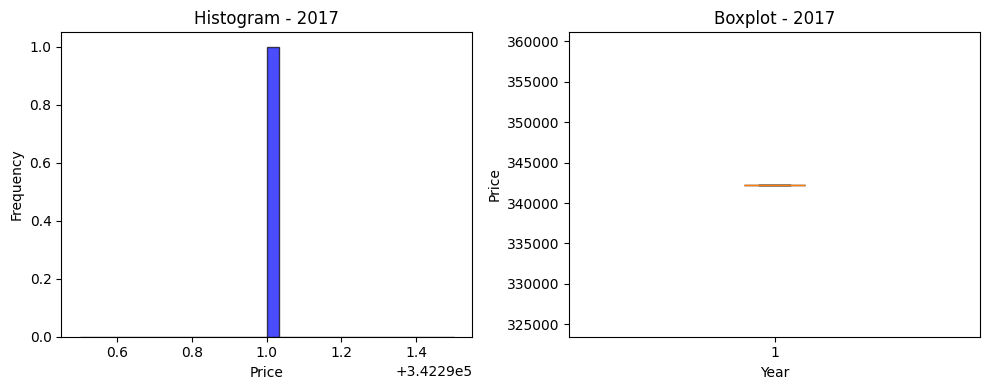

1


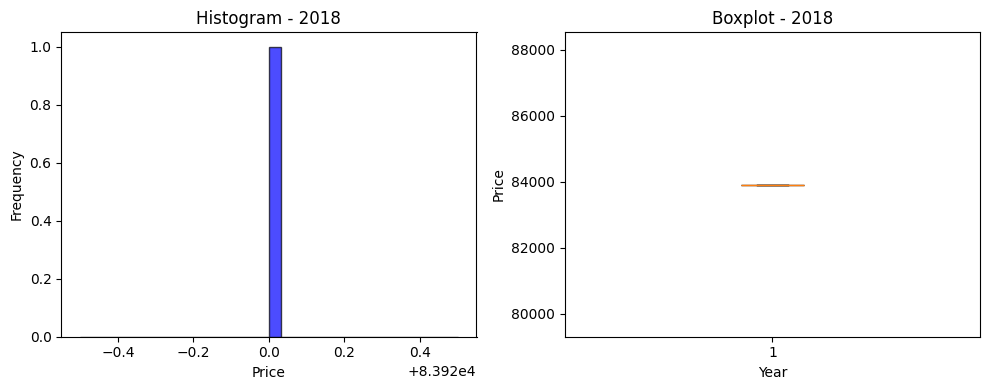

3


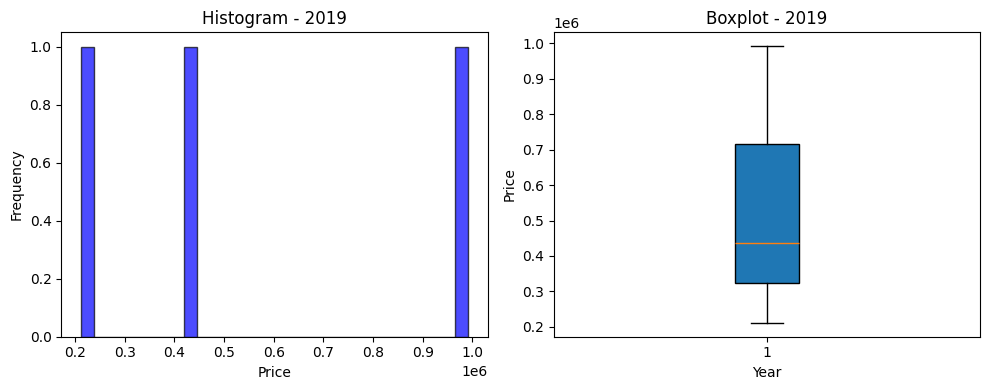

1


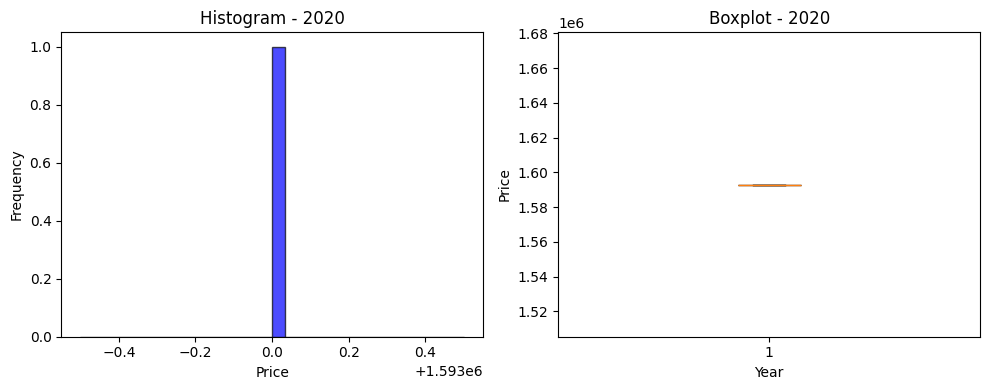

1


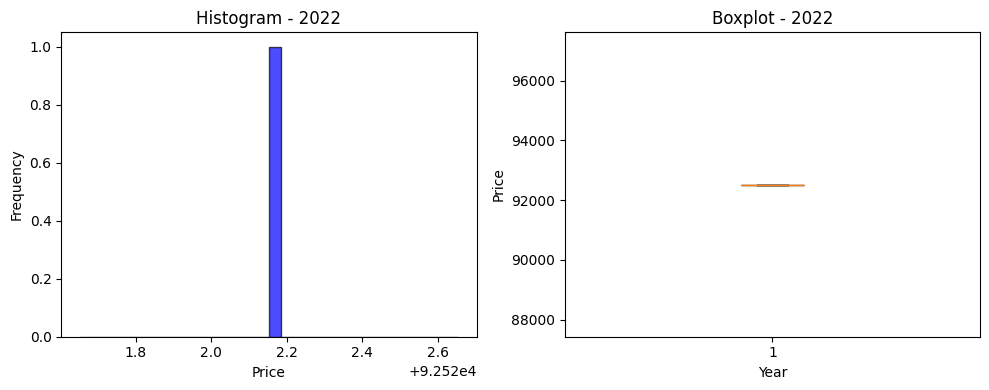

1


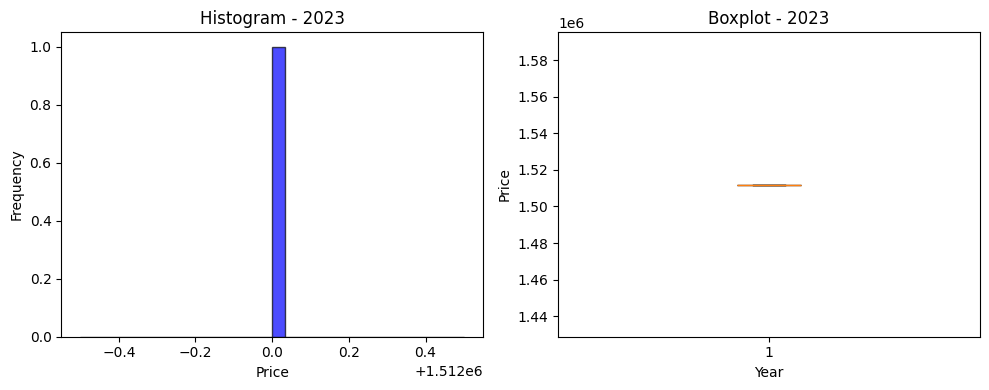

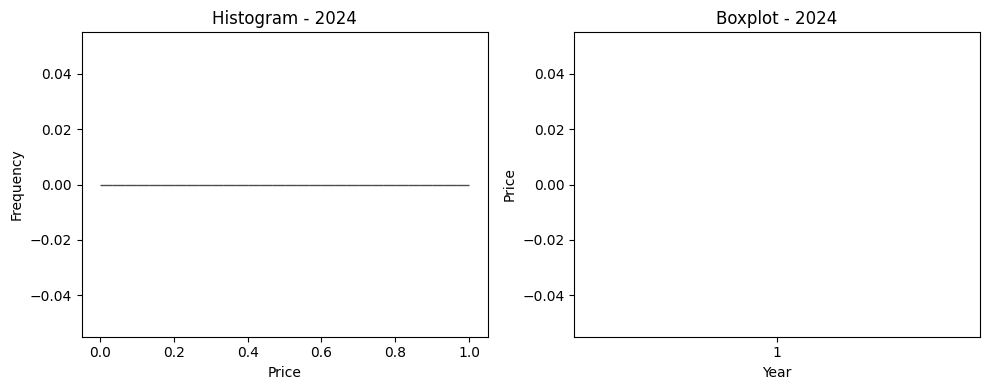

In [50]:

def getAveragePricePerYear(df):
    # # 날짜에서 연도 추출 (날짜 컬럼이 'date'로 가정)
    df['year'] = pd.to_datetime(df['end_date']).dt.year

    # # 년도별 그룹화
    grouped = df.groupby('year')

    average_prices = {}

    # # 각 년도별 데이터 처리
    for year, group in grouped:
        prices = group['price_USD'].astype(float)  # 숫자로 변환

        # 정규분포 기반 하위, 상위 필터링
        lower_bound = np.percentile(prices, 10)
        upper_bound = np.percentile(prices, 90)
        filtered_prices = prices[(prices >= lower_bound) & (prices <= upper_bound)]

        # 남은 데이터의 평균 계산
        if not filtered_prices.empty:
            if len(filtered_prices) > 1 :
                average_prices[year] = filtered_prices.mean()
                print(len(filtered_prices))
        
        # **년도별 가격 분포도 개별 그리기**
        plt.figure(figsize=(10, 4))

        # 히스토그램 (빈도수)
        plt.subplot(1, 2, 1)
        plt.hist(filtered_prices, bins=30, alpha=0.7, color='b', edgecolor='black')
        plt.xlabel("Price")
        plt.ylabel("Frequency")
        plt.title(f"Histogram - {year}")

        # 박스플롯 (이상치 포함)
        plt.subplot(1, 2, 2)
        plt.boxplot(filtered_prices, vert=True, patch_artist=True)
        plt.xlabel("Year")
        plt.ylabel("Price")
        plt.title(f"Boxplot - {year}")

        plt.tight_layout()
        plt.show()

    # 데이터프레임 변환
    avg_df = pd.DataFrame(list(average_prices.items()), columns=['Year', 'Average Price'])
    return avg_df

# 실행
# average_df = getAveragePricePerYear()
avg_df = getAveragePricePerYear(df)

   Year  Average Price
0  2010   3.090460e+05
1  2012   2.425000e+05
2  2014   3.291000e+04
3  2016   2.185000e+05
4  2017   3.422910e+05
5  2018   8.392000e+04
6  2019   5.467767e+05
7  2020   1.593000e+06
8  2022   9.252215e+04
9  2023   1.512000e+06


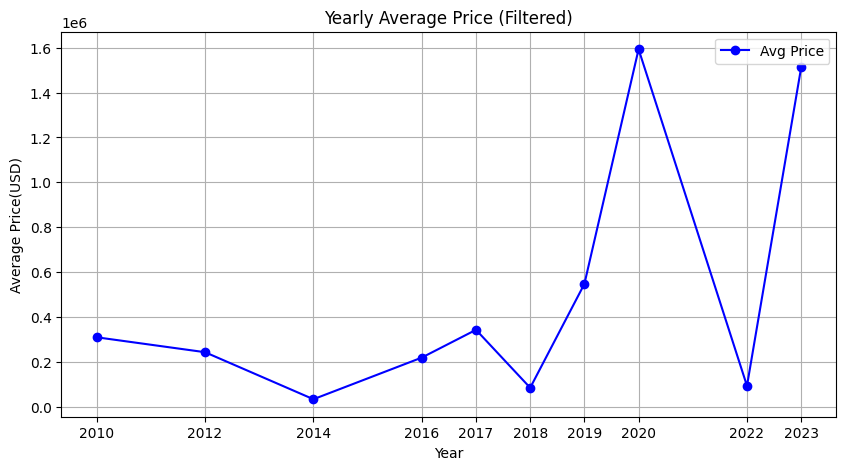

In [51]:
print(avg_df)
plt.figure(figsize=(10, 5))
plt.plot(avg_df['Year'], avg_df['Average Price'], marker='o', linestyle='-', color='b', label='Avg Price')
plt.xlabel("Year")
plt.ylabel("Average Price(USD)")
plt.title("Yearly Average Price (Filtered)")
plt.xticks(avg_df['Year'])  # 📌 x축 년도 고정
plt.legend()
plt.grid(True)
plt.show()

### 이상치 제거하는 방식 변경

In [34]:
df[(abs((df['price_USD']-df['price_USD'].mean())/df['price_USD'].std()))>1.96]

,artist,title,end_date,estimate_USD,price_USD,auction_site,year,artwork_type,edition,height_cm,width_cm,start_date,low_estimate,high_estimate,price,currency,low_estimate_USD,high_estimate_USD,estimateCurrency,type
77,Pablo_Picasso,Les femmes d'Alger (Version 'O'),2015-05-11T00:00:00,Estimate on request,1.793650e+08,Christies,2015,oil on canvas,NaN,113.98,146.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oil Painting
78,Pablo_Picasso,Buste de femme (Femme à la résille),2015-05-11T00:00:00,Estimate on request,6.736500e+07,Christies,2015,oil on canvas,NaN,65.10,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oil Painting
164,Pablo_Picasso,"Femme assise, robe bleue",2017-05-15T00:00:00,"USD 35,000,000 - 50,000,000",4.504750e+07,Christies,2017,oil on canvas,NaN,73.00,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oil Painting
180,Pablo_Picasso,Femme assise près d'une fenêtre (Marie-Thérèse),2021-05-13T00:00:00,Estimate on request,1.034100e+08,Christies,2021,oil on canvas,NaN,146.00,114.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oil Painting
199,Pablo_Picasso,"Nude, Green Leaves and Bust",2010-05-04T00:00:00,Estimate on request,1.064825e+08,Christies,2010,oil on canvas,NaN,162.00,130.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oil Painting
216,Pablo_Picasso,Portrait d'Angel Fernández de Soto,2010-06-23T00:00:00,"GBP 30,000,000 - 40,000,000",5.151647e+07,Christies,2010,oil on canvas,NaN,70.30,55.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oil Painting
256,Pablo_Picasso,Fillette à la corbeille fleurie,2018-05-08T00:00:00,Estimate on request,1.150000e+08,Christies,2018,oil on canvas,NaN,154.62,66.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oil Painting
336,Pablo Picasso,NaN,2023-11-09T08:00:00,NaN,1.393635e+08,sotheby's,2023,oil,1.0,130.00,97.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USD,Oil Painting
368,Pablo Picasso,NaN,2022-05-18T08:00:00,NaN,6.754100e+07,sotheby's,2022,oil,1.0,129.90,161.70,NaN,NaN,NaN,NaN,NaN,60000000.0,80000000.0,USD,Oil Painting
379,Pablo Picasso,NaN,2004-05-06T08:00:53,NaN,1.041680e+08,sotheby's,2004,Oil,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000000.0,70000000.0,USD,Oil Painting


In [21]:
def findOutliers(x,column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    y = x[(x[column] > (q3 + 1.5*iqr)) | (x[column] < (q1 - 1.5*iqr))]
    return len(y)

for field in fields:
    df = df_fields[field]
    print("==============================================")
    print("{field} price IQR outliers: ".format(field=field),findOutliers(df,'price_USD'))
    print("{field} price IQR outliers: ".format(field=field),findOutliers(df[(abs((df['price_USD']-df['price_USD'].mean())/df['price_USD'].std()))>1.96],'price_USD'))

Drawing price IQR outliers:  116
Drawing price IQR outliers:  0
Gouache Painting price IQR outliers:  3
Gouache Painting price IQR outliers:  0
Oil Painting price IQR outliers:  33
Oil Painting price IQR outliers:  0
Print price IQR outliers:  39
Print price IQR outliers:  0
Watercolor Painting price IQR outliers:  4
Watercolor Painting price IQR outliers:  0


## 연평균 가치 상승률

picasso 지수
그림 종류 : Oil Painting
연평균 가치 상승률: 2.58%
연평균 거래량 : 약 20.26개


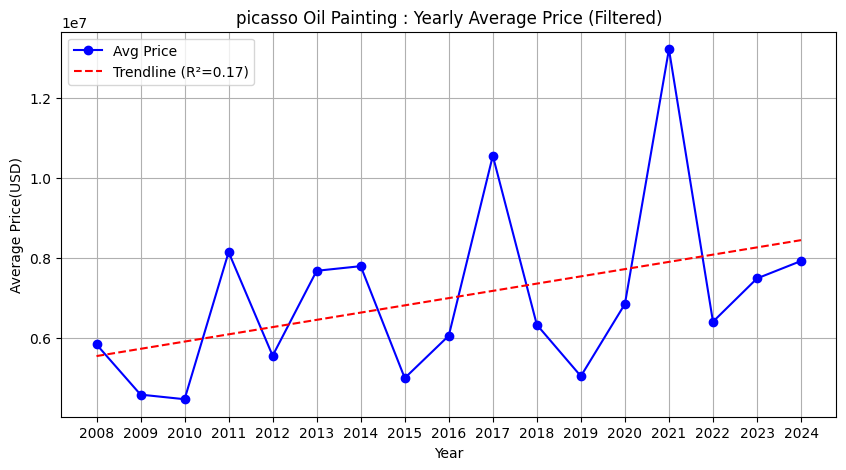

그림 종류 : Watercolor Painting
연평균 가치 상승률: 6.04%
연평균 거래량 : 약 1.50개


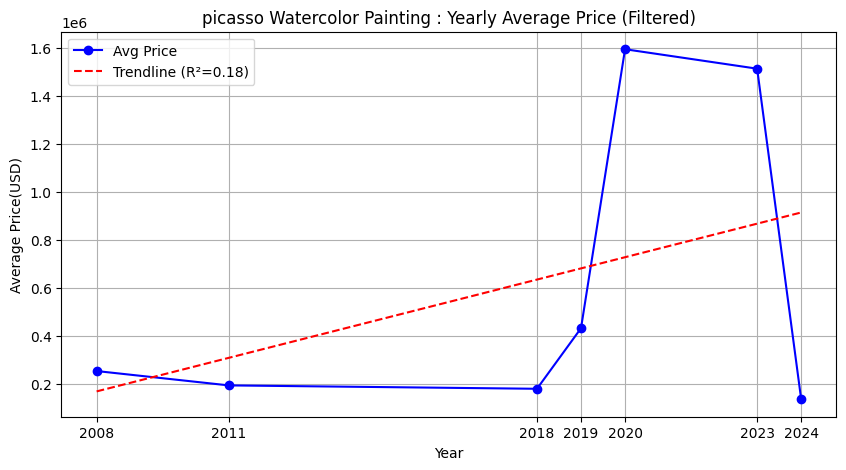

그림 종류 : Drawing
연평균 가치 상승률: -1.64%
연평균 거래량 : 약 52.06개


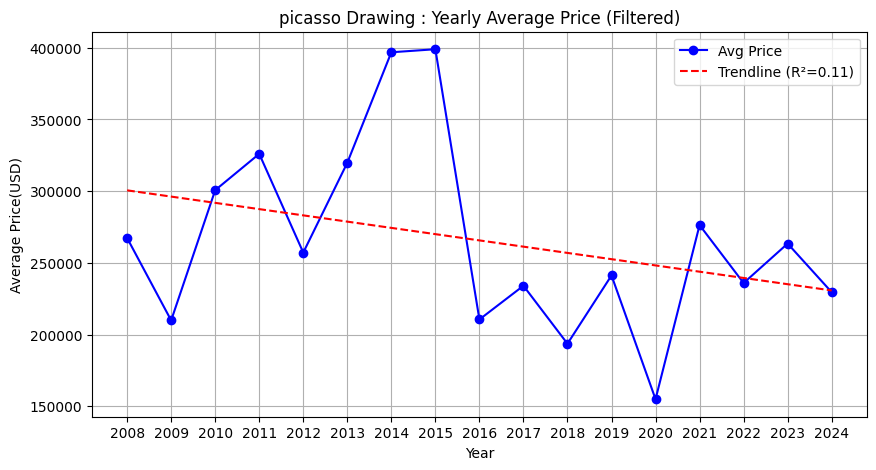

그림 종류 : Gouache Painting
연평균 가치 상승률: -5.04%
연평균 거래량 : 약 3.00개


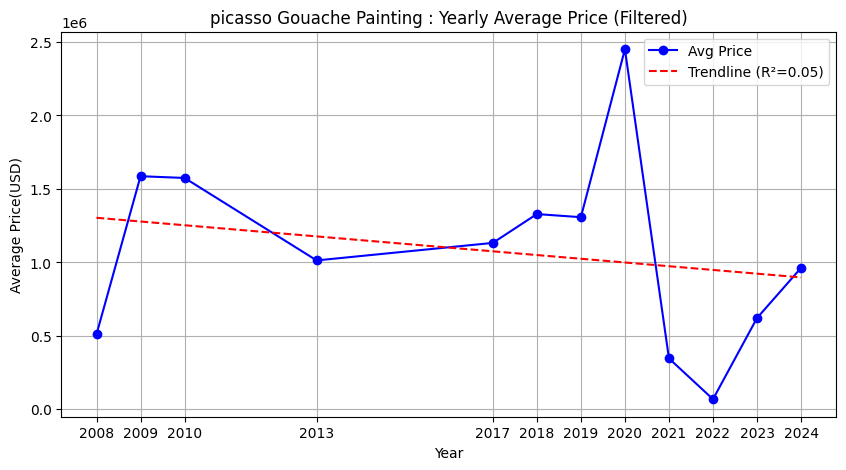

그림 종류 : Print
연평균 가치 상승률: -8.24%
연평균 거래량 : 약 28.85개


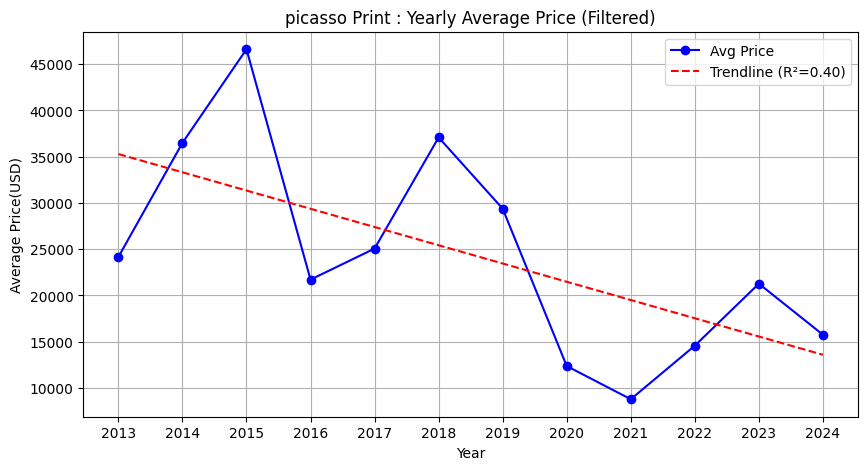

In [79]:
def getAveragePricePerYear_outlier(df, field):
    # # 날짜에서 연도 추출 (날짜 컬럼이 'date'로 가정)
    df['year'] = pd.to_datetime(df['end_date']).dt.year
    outlier = df[(abs((df['price_USD']-df['price_USD'].mean())/df['price_USD'].std()))>1.96].index
    df = df.drop(outlier)

    # # 년도별 그룹화
    grouped = df.groupby('year')

    yearly_counts = grouped['price_USD'].count()

    average_prices = {}

    # # 각 년도별 데이터 처리
    for year, group in grouped:
        prices = group['price_USD'].astype(float)  # 숫자로 변환
        if len(prices) > 1 :
            average_prices[year] = prices.mean()

    # 데이터프레임 변환
    avg_df = pd.DataFrame(list(average_prices.items()), columns=['Year', 'Average Price'])
    avg_df = avg_df.sort_values('Year')
    avg_df["Log Price"] = np.log(avg_df["Average Price"])
    # 로그 변환한 값으로 선형 회귀 적용
    slope, intercept, r_value, p_value, std_err = stats.linregress(avg_df["Year"], avg_df["Log Price"])

    print("그림 종류 : {field}".format(field=field))
    print(f"연평균 가치 상승률: {100 * (np.exp(slope) - 1):.2f}%")
    print("연평균 거래량 : 약 {count:.2f}개".format(count = yearly_counts.mean()))
    return avg_df

# 실행
# average_df = getAveragePricePerYear()
print("{artist} 지수".format(artist=artist))
for field in fields :
    df = df_fields[field]

    # 결측치 제거
    avg_df_outlier = getAveragePricePerYear_outlier(df,field)
    drawGraph(avg_df_outlier)


In [31]:
def drawGraph(avg_df_outlier):
    plt.figure(figsize=(10, 5))
    plt.plot(avg_df_outlier['Year'], avg_df_outlier['Average Price'], marker='o', linestyle='-', color='b', label='Avg Price')

        # 추세선 계산 및 추가
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        x=avg_df_outlier['Year'].astype('int'),  # 연도 숫자 변환
        y=avg_df_outlier['Average Price']
    )
    trendline = slope * avg_df_outlier['Year'] + intercept
    
    plt.plot(
        avg_df_outlier['Year'],
        trendline,
        color='red',
        linestyle='--',
        label=f'Trendline (R²={r_value**2:.2f})'
    )
    
    plt.xlabel("Year")
    plt.ylabel("Average Price(USD)")
    plt.title("{artist} {field} : Yearly Average Price (Filtered)".format(artist=artist,field=field))
    plt.xticks(avg_df_outlier['Year'])
    plt.legend()
    plt.grid(True)
    plt.show()

In [33]:
        # **년도별 가격 분포도 개별 그리기**
        # plt.figure(figsize=(10, 4))

        # # 히스토그램 (빈도수)
        # plt.subplot(1, 2, 1)
        # plt.hist(prices, bins=30, alpha=0.7, color='b', edgecolor='black')
        # plt.xlabel("Price")
        # plt.ylabel("Frequency")
        # plt.title(f"Histogram - {year}")

        # # 박스플롯 (이상치 포함)
        # plt.subplot(1, 2, 2)
        # plt.boxplot(prices, vert=True, patch_artist=True)
        # plt.xlabel("Year")
        # plt.ylabel("Price")
        # plt.title(f"Boxplot - {year}")

        # plt.tight_layout()
        # plt.show()